In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('..')  # Adds the parent directory to the path

from tax import calculate_dutch_tax as calculate_dutch_tax

In [28]:
# Updated function to include the ruling parameter
def get_net_year_and_effective_tax_rate(income, ruling):
    result = calculate_dutch_tax(income, False, True, False, 40, 2024, ruling)
    if result:
        net_year = result.get('netYear', 0)
        effective_tax_rate = ((income - net_year) / income) * 100 if income else 0
        return net_year, effective_tax_rate
    else:
        return 0, 0

# Generate data points for both scenarios
incomes = np.arange(10000, 150001, 5000)
data = []
for ruling in [False, True]:
    for income in incomes:
        net_year, effective_tax_rate = get_net_year_and_effective_tax_rate(income, ruling)
        data.append({
            'Pre-Tax Salary': income,
            'After-Tax Salary': net_year,
            'Effective Tax Rate': effective_tax_rate,
            '30% Ruling': 'With Ruling' if ruling else 'Without Ruling'
        })

df = pd.DataFrame(data)
df_without_ruling = df[df['30% Ruling'] == 'Without Ruling']
df_with_ruling = df[df['30% Ruling'] == 'With Ruling']

In [29]:
df

,Pre-Tax Salary,After-Tax Salary,Effective Tax Rate,30% Ruling
0,10000,10000.00,0.000000,Without Ruling
1,15000,14887.83,0.747800,Without Ruling
2,20000,19610.98,1.945100,Without Ruling
3,25000,24269.60,2.921600,Without Ruling
4,30000,27213.15,9.289500,Without Ruling
5,35000,30156.70,13.838000,Without Ruling
6,40000,33096.39,17.259025,Without Ruling
7,45000,35590.89,20.909133,Without Ruling
8,50000,38085.39,23.829220,Without Ruling
9,55000,40579.89,26.218382,Without Ruling


/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

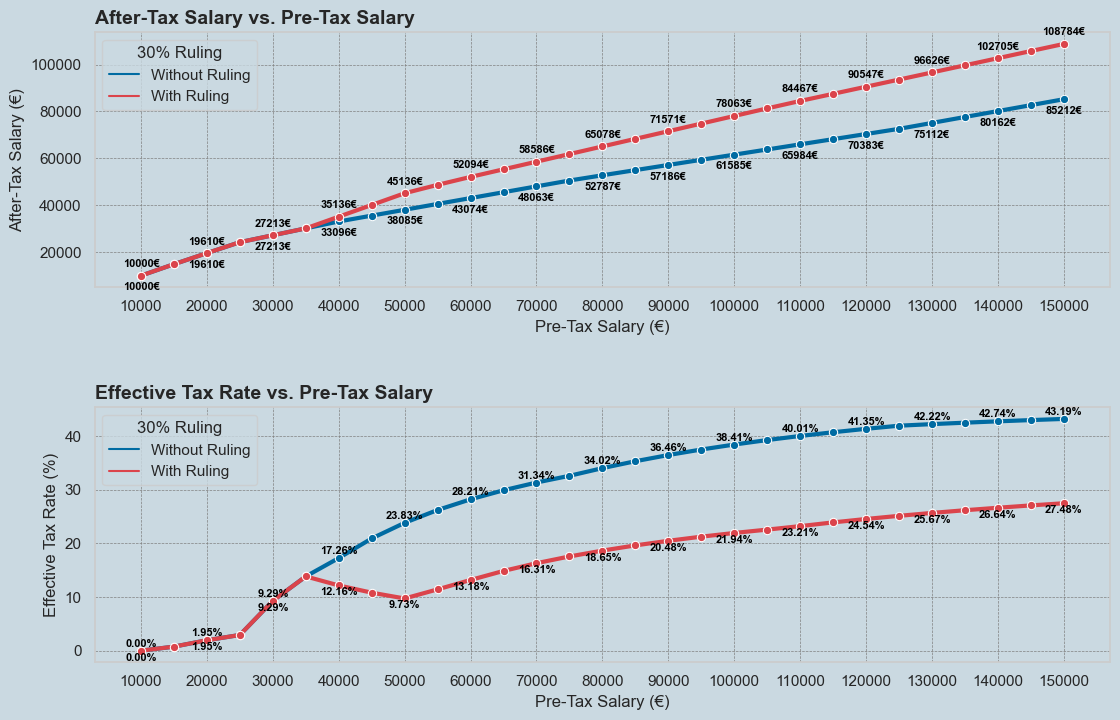

In [44]:
# Define the background color
bg_color = '#CAD9E1'

# Calculate a reasonable offset based on the range of y-values
y_range_after_tax = df['After-Tax Salary'].max() - df['After-Tax Salary'].min()
y_offset_after_tax = y_range_after_tax * 0.05  # 1% of the range for offset

y_range_effective_tax = df['Effective Tax Rate'].max() - df['Effective Tax Rate'].min()
y_offset_effective_tax = y_range_effective_tax * 0.03  # 1% of the range for offset

# Plotting with updated style
plt.figure(facecolor=bg_color, figsize=(12, 8))

# After-Tax Salary Plot
ax1 = plt.subplot(2, 1, 1, facecolor=bg_color)
sns.lineplot(x='Pre-Tax Salary', y='After-Tax Salary', hue='30% Ruling', data=df, palette=['#006BA2', '#DB444B'], marker='o', linewidth=3)
plt.title('After-Tax Salary vs. Pre-Tax Salary', fontsize=14, fontweight='bold', loc='left')
plt.xlabel('Pre-Tax Salary (€)')
plt.ylabel('After-Tax Salary (€)')
legend = plt.legend(title='30% Ruling')
legend.get_frame().set_facecolor(bg_color)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.xticks(ticks=np.arange(10000, 160000, 10000))
plt.minorticks_off()

# Annotations for 'After-Tax Salary' plot
for ruling, adjust in zip(['With Ruling', 'Without Ruling'], [-y_offset_after_tax, y_offset_after_tax]):
    ruling_df = df[df['30% Ruling'] == ruling]
    for x, y in ruling_df[ruling_df['Pre-Tax Salary'] % 10000 == 0].groupby('Pre-Tax Salary')['After-Tax Salary'].mean().items():
        ax1.text(x, y - adjust, f"{int(y)}€", verticalalignment='center', horizontalalignment='center', color='black', fontsize=8, fontweight='bold')

# Effective Tax Rate Plot
ax2 = plt.subplot(2, 1, 2, facecolor=bg_color)
sns.lineplot(x='Pre-Tax Salary', y='Effective Tax Rate', hue='30% Ruling', data=df, palette=['#006BA2', '#DB444B'], marker='o', linewidth=3)
plt.title('Effective Tax Rate vs. Pre-Tax Salary', fontsize=14, fontweight='bold', loc='left')
plt.xlabel('Pre-Tax Salary (€)')
plt.ylabel('Effective Tax Rate (%)')
legend = plt.legend(title='30% Ruling')
legend.get_frame().set_facecolor(bg_color)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.xticks(ticks=np.arange(10000, 160000, 10000))
plt.minorticks_off()

# Annotations for 'Effective Tax Rate' plot
for ruling, adjust in zip(['With Ruling', 'Without Ruling'], [y_offset_effective_tax, -y_offset_effective_tax]):
    ruling_df = df[df['30% Ruling'] == ruling]
    for x, rate in ruling_df[ruling_df['Pre-Tax Salary'] % 10000 == 0].groupby('Pre-Tax Salary')['Effective Tax Rate'].mean().items():
        ax2.text(x, rate - adjust, f"{rate:.2f}%", verticalalignment='center', horizontalalignment='center', color='black', fontsize=8, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()


/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jiapengzhang/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

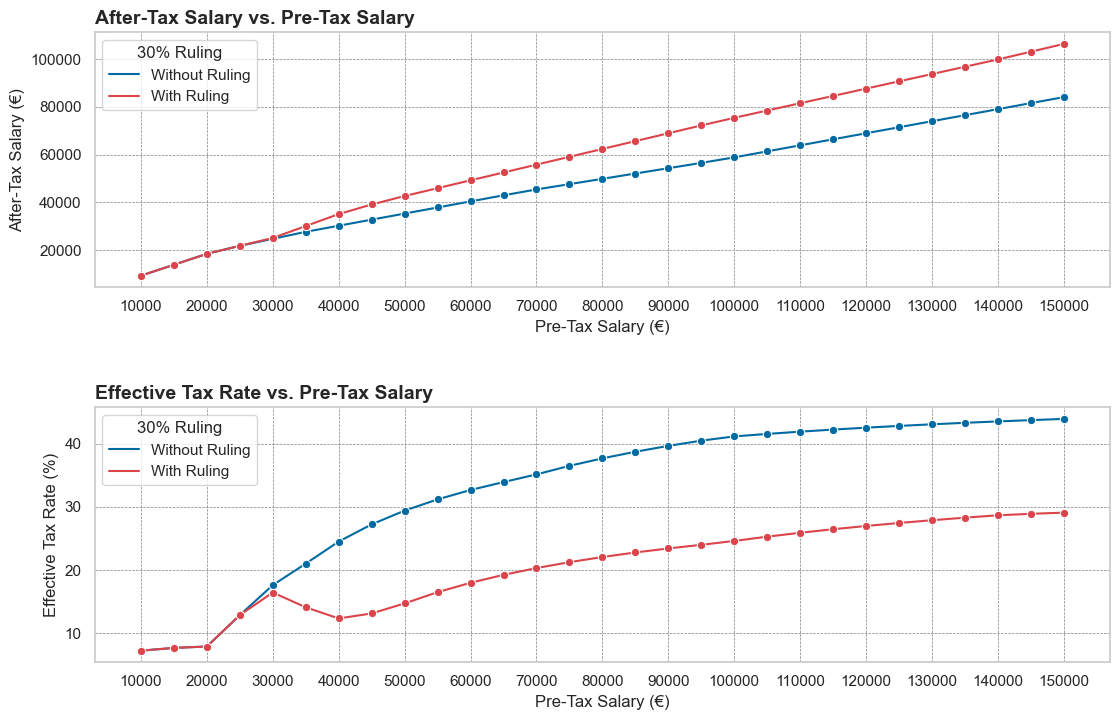

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated function to include the ruling parameter
def get_net_year_and_effective_tax_rate(income, ruling):
    result = calculate_dutch_tax(income, False, True, False, 40, 2020, ruling)
    if result:
        net_year = result.get('netYear', 0)
        effective_tax_rate = ((income - net_year) / income) * 100 if income else 0
        return net_year, effective_tax_rate
    else:
        return 0, 0

# Generate data points for both scenarios
incomes = np.arange(10000, 150001, 5000)
data = []
for ruling in [False, True]:
    for income in incomes:
        net_year, effective_tax_rate = get_net_year_and_effective_tax_rate(income, ruling)
        data.append({
            'Pre-Tax Salary': income,
            'After-Tax Salary': net_year,
            'Effective Tax Rate': effective_tax_rate,
            '30% Ruling': 'With Ruling' if ruling else 'Without Ruling'
        })

df = pd.DataFrame(data)

# Plotting
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

# After-Tax Salary Plot
plt.subplot(2, 1, 1)
sns.lineplot(x='Pre-Tax Salary', y='After-Tax Salary', hue='30% Ruling', data=df, palette=['#006BA2', '#DB444B'], marker='o')
plt.title('After-Tax Salary vs. Pre-Tax Salary', fontsize=14, fontweight='bold', loc='left')
plt.xlabel('Pre-Tax Salary (€)')
plt.ylabel('After-Tax Salary (€)')
plt.legend(title='30% Ruling')
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.xticks(ticks=np.arange(10000, 160000, 10000))
plt.minorticks_off()

# Effective Tax Rate Plot
plt.subplot(2, 1, 2)
sns.lineplot(x='Pre-Tax Salary', y='Effective Tax Rate', hue='30% Ruling', data=df, palette=['#006BA2', '#DB444B'], marker='o')
plt.title('Effective Tax Rate vs. Pre-Tax Salary', fontsize=14, fontweight='bold', loc='left')
plt.xlabel('Pre-Tax Salary (€)')
plt.ylabel('Effective Tax Rate (%)')
plt.legend(title='30% Ruling')
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.xticks(ticks=np.arange(10000, 160000, 10000))
plt.minorticks_off()

plt.tight_layout(pad=3.0)
plt.show()
